<img src = "https://www.bits-pilani.ac.in/Uploads/Campus/BITS_university_logo.gif">

<h1><center>Work Integrated Learning Programmes Division<br>
M.Tech (Data Science and Engineering)<br> Data Visualization And Interpretation (DSECL ZG555))<br>
First Semester, 2020-21
</center></h1>

<h2><center>Assignment 2 – PS3 [Weightage 13%]</center></h2>

<ol>
  <li>Do not change the name of the data file that is shared with the problem statement.</li>
  <li>If intermediate data files are created, retain in the present working directory and attach them during submission.</li>
  <li>Retain the data file in the same directory as that of this workbook.</li>
  <li>Retain the Visualizations that is produced in the file. Don't clear them away.</li>
  <li>Submit only the .IPYNB file. Intermediate files to be attached as mentioned in (2).</li>
  <li>All the visuals should adhere to the visualization principles learnt in the Course.</li>
  <li>All your visuals should be adequately labelled.</li>
  <li>Fill in the below asked information.</li>
</ol>

<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>

<h2>Group No</h2>

<table>
  <tr>
    <th>Full Name</th>
    <th>BITS ID</th>
  </tr>
  <tr>
    <td>HARISH K</td>
    <td>2019HC04854</td>
  </tr>
  <tr>
    <td>ROHAN SRIVASTAVA</td>
    <td>2019HC04873</td>
  </tr>
  <tr>
    <td>TAMILARASU S</td>
    <td>2019HC04524</td>
  </tr>
</table>

<h3>Objective</h3>
<h4>What are the features which have the most impact on the car price?</h4>

##  Download and Prep the Data: 3 Marks

<h4>Import the libraries needed</h4>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

<h4> Load data and store in dataframe </h4>

In [2]:
ds=pd.read_csv('dvi-a2-ps3-data.csv')
pd.set_option('display.max_columns', None)
ds.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<h4>Find out  what type of variable you are dealing with. This will help you find the right visualization method for that variable.</p>


In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

<font color='black'>
    Stroke has 4 missing values & horsepower-binned has 1 missing values, hence droping the missing values to have non-null data set.
</font> 

In [4]:
ds[ds.duplicated()]

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas


No duplicated values identified.


In [5]:
ds = ds.dropna(axis=0,how='any')

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          196 non-null    int64  
 1   normalized-losses  196 non-null    int64  
 2   make               196 non-null    object 
 3   aspiration         196 non-null    object 
 4   num-of-doors       196 non-null    object 
 5   body-style         196 non-null    object 
 6   drive-wheels       196 non-null    object 
 7   engine-location    196 non-null    object 
 8   wheel-base         196 non-null    float64
 9   length             196 non-null    float64
 10  width              196 non-null    float64
 11  height             196 non-null    float64
 12  curb-weight        196 non-null    int64  
 13  engine-type        196 non-null    object 
 14  num-of-cylinders   196 non-null    object 
 15  engine-size        196 non-null    int64  
 16  fuel-system        196 non

<h4> Find the correlation between the following columns: bore, stroke,compression-ratio , and horsepower<br>
Write down your observations in a markdown cell below <h4>

                       bore    stroke  compression-ratio  horsepower
bore               1.000000 -0.049606          -0.000044    0.579114
stroke            -0.049606  1.000000           0.191776    0.139409
compression-ratio -0.000044  0.191776           1.000000   -0.232284
horsepower         0.579114  0.139409          -0.232284    1.000000


Text(0.5, 1.0, 'Correlation between bore, stroke,compression-ratio and horsepower \n')

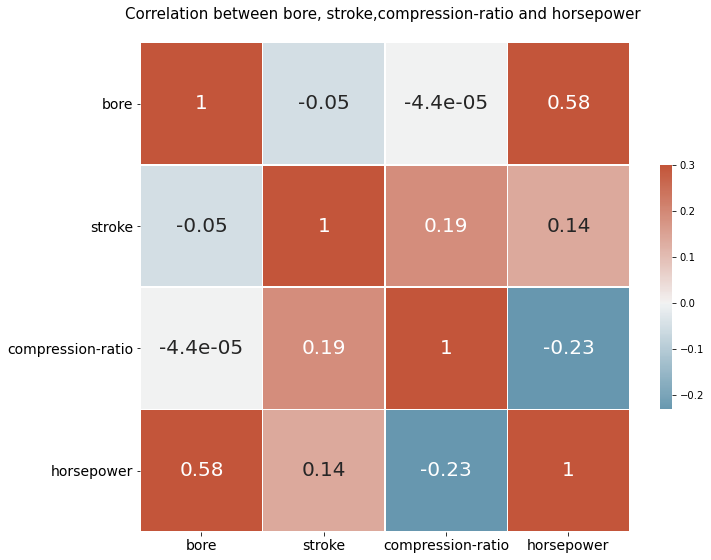

In [7]:
ds_corr=ds[['bore','stroke','compression-ratio','horsepower']]
corr = ds_corr.corr()
print(corr)
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True, annot_kws={"fontsize":20})    
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14,rotation=0)
plt.title('Correlation between bore, stroke,compression-ratio and horsepower \n',fontsize=15)

<b><font color='Black'>Answer: Observations:
1. Bore and horsepower are postively corelated.
2. horsepower and compression-ratio are sparsly negatively corelated.
3. Compression-ratio and stroke are sparsly positively coreleated.
4. horsepower and stroke are sparsly positively coreleated.
5. All other features are not correlated.</font></b>

# Visualisation Questions - 2X5 = 10 Marks

### Question 1
<h4>What kind of a correlation exists between<br><br>
    a."engine-size" and "price"<br><br>
    b."highway-mpg" and "price"<br><br>
    c."peak-rpm" and "price"<br><br>
    Use appropriate visuals to demonstrate the same.Use subplots.
<h4>Clearly mention in markdown cells below the visual <br><br>1.You obseravtaion about the relationship .Which among engine-size ,highway-mpg and peak-rpm is a potential predictor variable of price<br><br>
    2.The reason for selecting the chart type you did in a markdown cell below

,Feature,Correlation Value
0,engine-size,0.889265
1,highway-mpg,-0.707466
2,peak-rpm,-0.103535


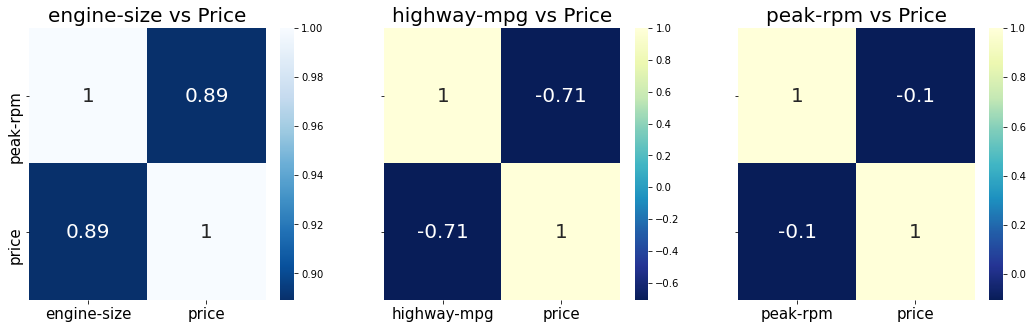

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
cpl_ds=['Blues_r', 'YlGnBu_r', 'YlGnBu_r']
for idx,i in enumerate(["engine-size",'highway-mpg','peak-rpm']):
    cor_data=ds[[i,"price"]].corr()
    sns.heatmap(cor_data,ax=axes[idx],annot=True,cmap=cpl_ds[idx], annot_kws={"fontsize":20})    
    axes[idx].set_title(i+" vs Price",fontsize=20)
    axes[idx].xaxis.set_tick_params(labelsize=15)
    axes[idx].yaxis.set_tick_params(labelsize=15)
corr_data =[['engine-size',ds['price'].corr(ds['engine-size'])],['highway-mpg',ds['price'].corr(ds['highway-mpg'])],['peak-rpm',ds['price'].corr(ds['peak-rpm'])]]
corr_ds = pd.DataFrame(corr_data, columns = ['Feature', 'Correlation Value']) 
corr_ds

Text(0.5, 1.0, 'Correlation between engine-size, highway-mpg, peak-rpm and price')

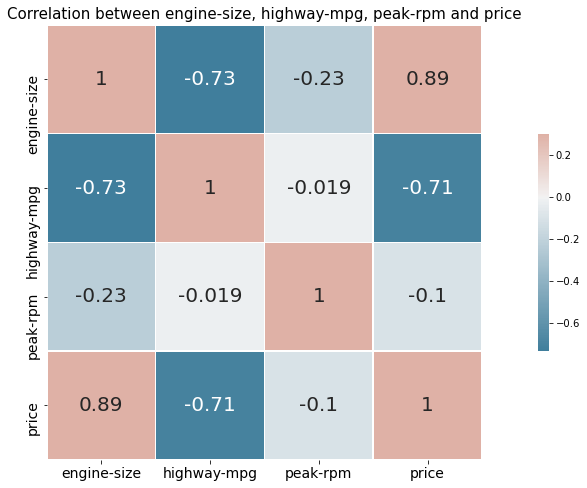

In [9]:
bx_plt=["engine-size","highway-mpg","peak-rpm"]
ds_corr=ds[["engine-size","highway-mpg","peak-rpm","price"]]

corr = ds_corr.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr,cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True, annot_kws={"fontsize":20})    
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
plt.title('Correlation between engine-size, highway-mpg, peak-rpm and price',fontsize=15)

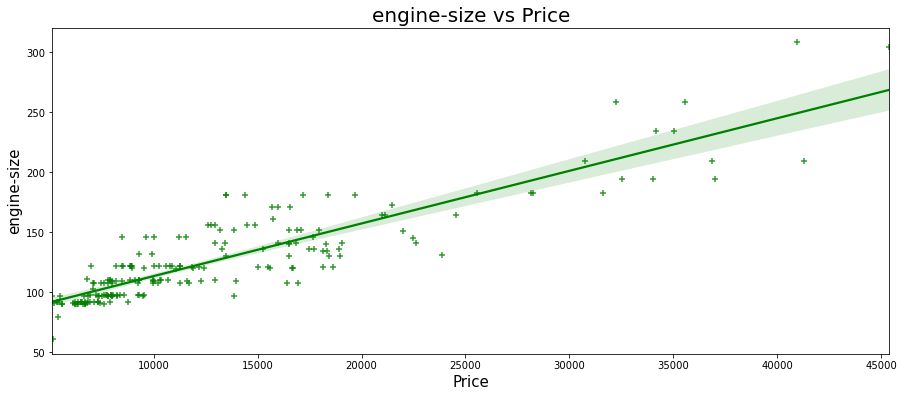

<Figure size 432x288 with 0 Axes>

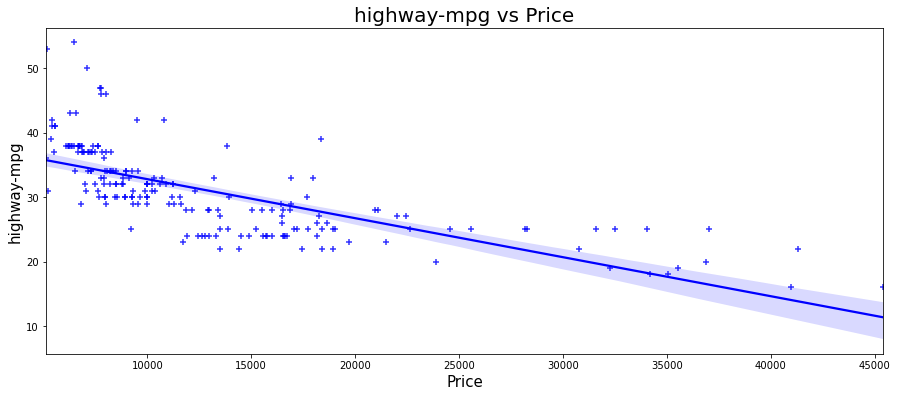

<Figure size 432x288 with 0 Axes>

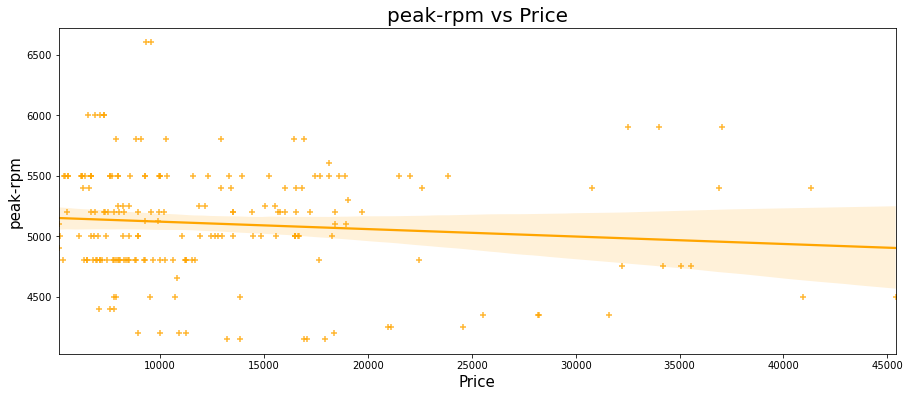

<Figure size 432x288 with 0 Axes>

In [10]:
clr_ds=['g','b','orange']
for idx,cat_col in enumerate(bx_plt):
    plt.figure(figsize = (15,6))
    sns.regplot(data=ds, x="price", y=cat_col, marker="+", color=clr_ds[idx])
    plt.title(cat_col+' vs Price', fontsize=20)
    plt.xlabel('Price', fontsize=15)
    plt.ylabel(cat_col, fontsize=15)
    plt.show()
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.3, hspace=.2)

From above visualization, below points are evident:
<br/><br/><font color='green'><b>Regression Chart 1:</b> Price is strongly postively coreleated to engine-size. So bigger the engine size, higher the price.</font>
<br/><font color='blue'>
    <b>Regression Chart 2:</b> Price is negatively corelated to Highway-mpg. Hence higher the highway-mpg, lower the price. Highway-mpg is negatively corelated to Engine size. Hence, bigger the engine size. lower the highway-mpg.</font>
<br/><font color='orange'>
    <b>Regression Chart 3:</b> Negligible correlation exists between peak-rpm and price.</font>

<br><b>1.You obseravtaion about the relationship .Which among engine-size ,highway-mpg and peak-rpm is a potential predictor variable of price</b>
<br><br>
As per the above visualization and inferences, Engine-size predicts the price more accurately and it also accounts for highway-mpg. Hence, <b>Engine-size could be potential predicator</b> among the given three variables.

<br><b>
    2.The reason for selecting the chart type</b>

1. <b>Heat map</b> visualizes the corelation perfectly among numeric attributes. 
2. <b>Linear Line graph</b> visualizes the relation between two continuous variables.

### Question 2
<h4> Use boxplots to visualise the relationship between<br>
    a."body-style" and "price". <br><br>
    b."engine-location" and "price" <br><br>
    c."drive-wheels"and "price" <br><br>   
    Use appropriate visuals to demonstrate the same.Use subplots.
<h4>Clearly mention in markdown cells below the visual <br>1.Your observataion about the relationship .Which among engine-location ,body-style and drive-wheels is a potential predictor variable of price<br>
    

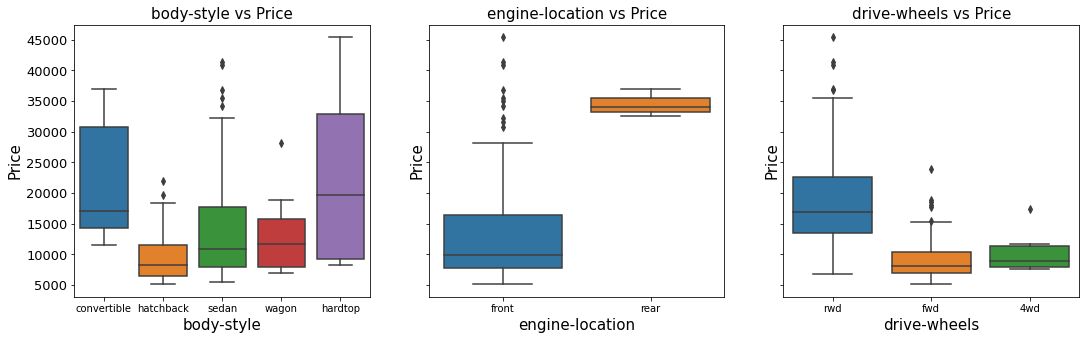

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
for idx,col in enumerate(['body-style','engine-location','drive-wheels']):
    sns.boxplot(ax=axes[idx],x=ds[col],y=ds['price'])
    axes[idx].set_title(col+" vs Price",fontsize=15)
    axes[idx].xaxis.set_tick_params(labelsize=10,rotation=0)
    axes[idx].yaxis.set_tick_params(labelsize=13)
    axes[idx].set_xlabel(col,fontsize=15)
    axes[idx].set_ylabel('Price',fontsize=15)

<b><br>1.Your observataion about the relationship .Which among engine-location ,body-style and drive-wheels is a potential predictor variable of price<br></b></br>

i. Among engine-location, body-style and drive-wheels, with the help of box-plots we conclude that <b>drive-wheels is a potential predictor variable of price</b></br>

ii. Although, if we ignore the outliers on Engine-location data, it may predict the price very accurately.

### Question 3 
<h4> Perform a Descriptive Statistical Analysis of the data set<br>
    Compute basic statistics for all continuous variables

In [12]:
ds.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.00000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,0.801020,121.428571,98.852041,0.837183,0.914846,53.882143,2551.50000,126.969388,3.329643,3.259439,10.173061,102.472002,5100.258872,25.413265,30.913265,13094.658163,9.819073,0.102041,0.897959
std,1.230467,32.149650,6.118651,0.059556,0.029181,2.365031,513.79767,38.807468,0.271071,0.318079,4.053371,36.012855,467.021518,6.327606,6.738913,7875.984533,2.426332,0.303477,0.303477
min,-2.000000,65.000000,86.600000,0.678039,0.837500,48.800000,1488.00000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,14.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,97.250000,94.500000,0.799135,0.889931,52.000000,2145.00000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,20.000000,25.000000,7765.750000,7.833333,0.000000,1.000000
50%,1.000000,122.000000,97.000000,0.832292,0.909028,54.100000,2417.00000,120.000000,3.310000,3.290000,9.000000,95.000000,5112.684729,25.000000,30.000000,10096.500000,9.400000,0.000000,1.000000
75%,2.000000,134.750000,102.400000,0.881788,0.926042,55.625000,2928.25000,142.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.500000,16500.750000,11.750000,0.000000,1.000000
max,3.000000,256.000000,120.900000,1.000000,1.000000,59.800000,4066.00000,308.000000,3.940000,4.170000,23.000000,207.000000,6600.000000,49.000000,54.000000,45400.000000,16.785714,1.000000,1.000000


In [13]:
print('Diesel:',ds.diesel.unique(),'; Gas:',ds.gas.unique())

Diesel: [0 1] ; Gas: [1 0]


<b>There are 19 Numerical Attributes, Out of which diesel and gas are not continuous variable. hence, not considering for Descriptive statistical Analysis. </b>

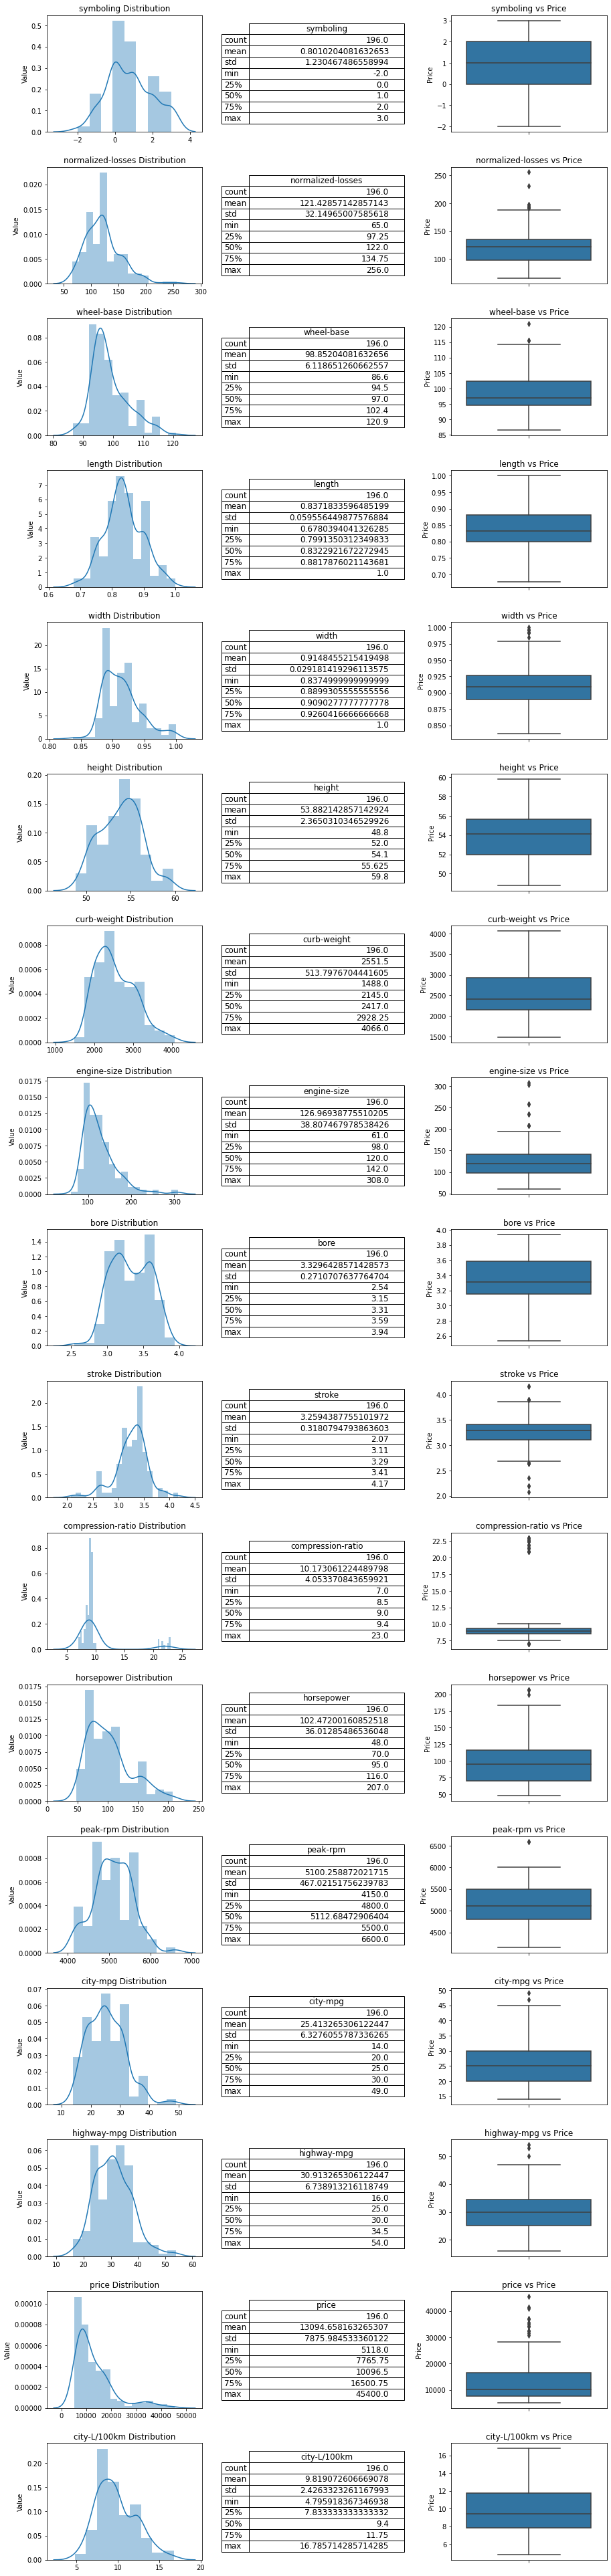

In [14]:
warnings.simplefilter(action='ignore', category=FutureWarning)
fig, axes = plt.subplots(nrows=17, ncols=3, figsize=(15, 70))    
for idx,cat_col in enumerate(ds.describe().columns[:17]):
    cl_idx=0
    sns.distplot(ds[cat_col],ax=axes[idx,cl_idx])
    plt.title(cat_col)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.3, hspace=.2)
    axes[idx][cl_idx].set_title(cat_col+" Distribution",fontsize=12)    
    axes[idx][cl_idx].xaxis.set_tick_params(labelsize=10,rotation=0)
    axes[idx][cl_idx].yaxis.set_tick_params(labelsize=10)
    axes[idx][cl_idx].set_ylabel('Value',fontsize=10)
    axes[idx][cl_idx].set(xlabel=None)
    
    df = pd.DataFrame(ds[cat_col], columns=[cat_col])
    des_lb=df.describe()
    axes[idx][cl_idx+1].axis('off')
    axes[idx][cl_idx+1].axis('tight')
    table = axes[idx][cl_idx+1].table(cellText=des_lb.values, colLabels=des_lb.columns, rowLabels=des_lb.index, loc='center')
    table.set_fontsize(12)
    table.scale(1,1.5)
    
    sns.boxplot(y=ds[cat_col],ax=axes[idx,cl_idx+2])
    plt.title(cat_col)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.3, hspace=.30)
    axes[idx][cl_idx+2].set_title(cat_col+" vs Price",fontsize=12)     
    axes[idx][cl_idx+2].yaxis.set_tick_params(labelsize=10)
    axes[idx][cl_idx+2].set_ylabel('Price',fontsize=10)

<b>Understanding: 
    <br>
    From Dist plots and statistic description table, we understood that how different attributes are distributed, whether they are positively skewed, negatively skewed or follow nearly normal distribition.
</b>

<AxesSubplot:title={'center':'Continuous Attributes Correlation'}>

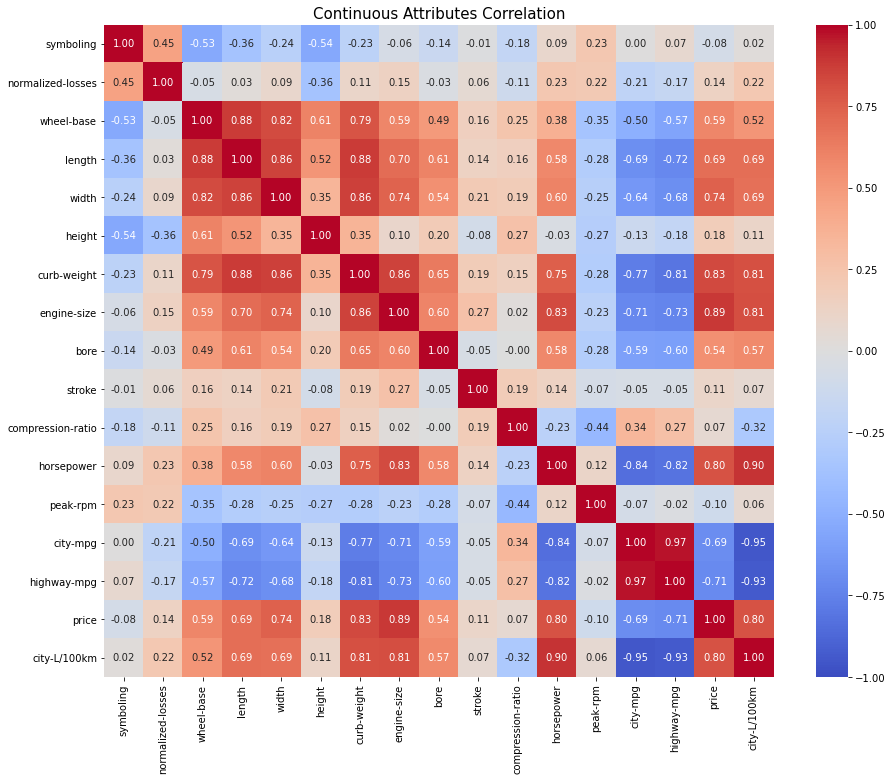

In [15]:
plt.figure(figsize=(15,12))
plt.title('Continuous Attributes Correlation', fontsize=15)
ds_corr_sa=ds.copy()
ds_corr_sa=ds_corr_sa.drop('diesel',axis=1)
ds_corr_sa=ds_corr_sa.drop('gas',axis=1)
sns.heatmap(ds_corr_sa.corr(), vmin=-1, vmax=1., square=False,annot=True, fmt='.2f', cmap="coolwarm")

Above Heatmap visualizes the correlation among the continuous attributes.

  ### Question 4
  <h4> Perform a Descriptive Statistical Analysis of the data set<br>
    Compute basic statistics for all variables of type 'Object'

In [16]:
Object_type_columns=[i for i in ds.columns if ds[i].dtypes=='object']
len(Object_type_columns)
ds[Object_type_columns].head()

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
0,alfa-romero,std,two,convertible,rwd,front,dohc,four,mpfi,Medium
1,alfa-romero,std,two,convertible,rwd,front,dohc,four,mpfi,Medium
2,alfa-romero,std,two,hatchback,rwd,front,ohcv,six,mpfi,Medium
3,audi,std,four,sedan,fwd,front,ohc,four,mpfi,Medium
4,audi,std,four,sedan,4wd,front,ohc,five,mpfi,Medium


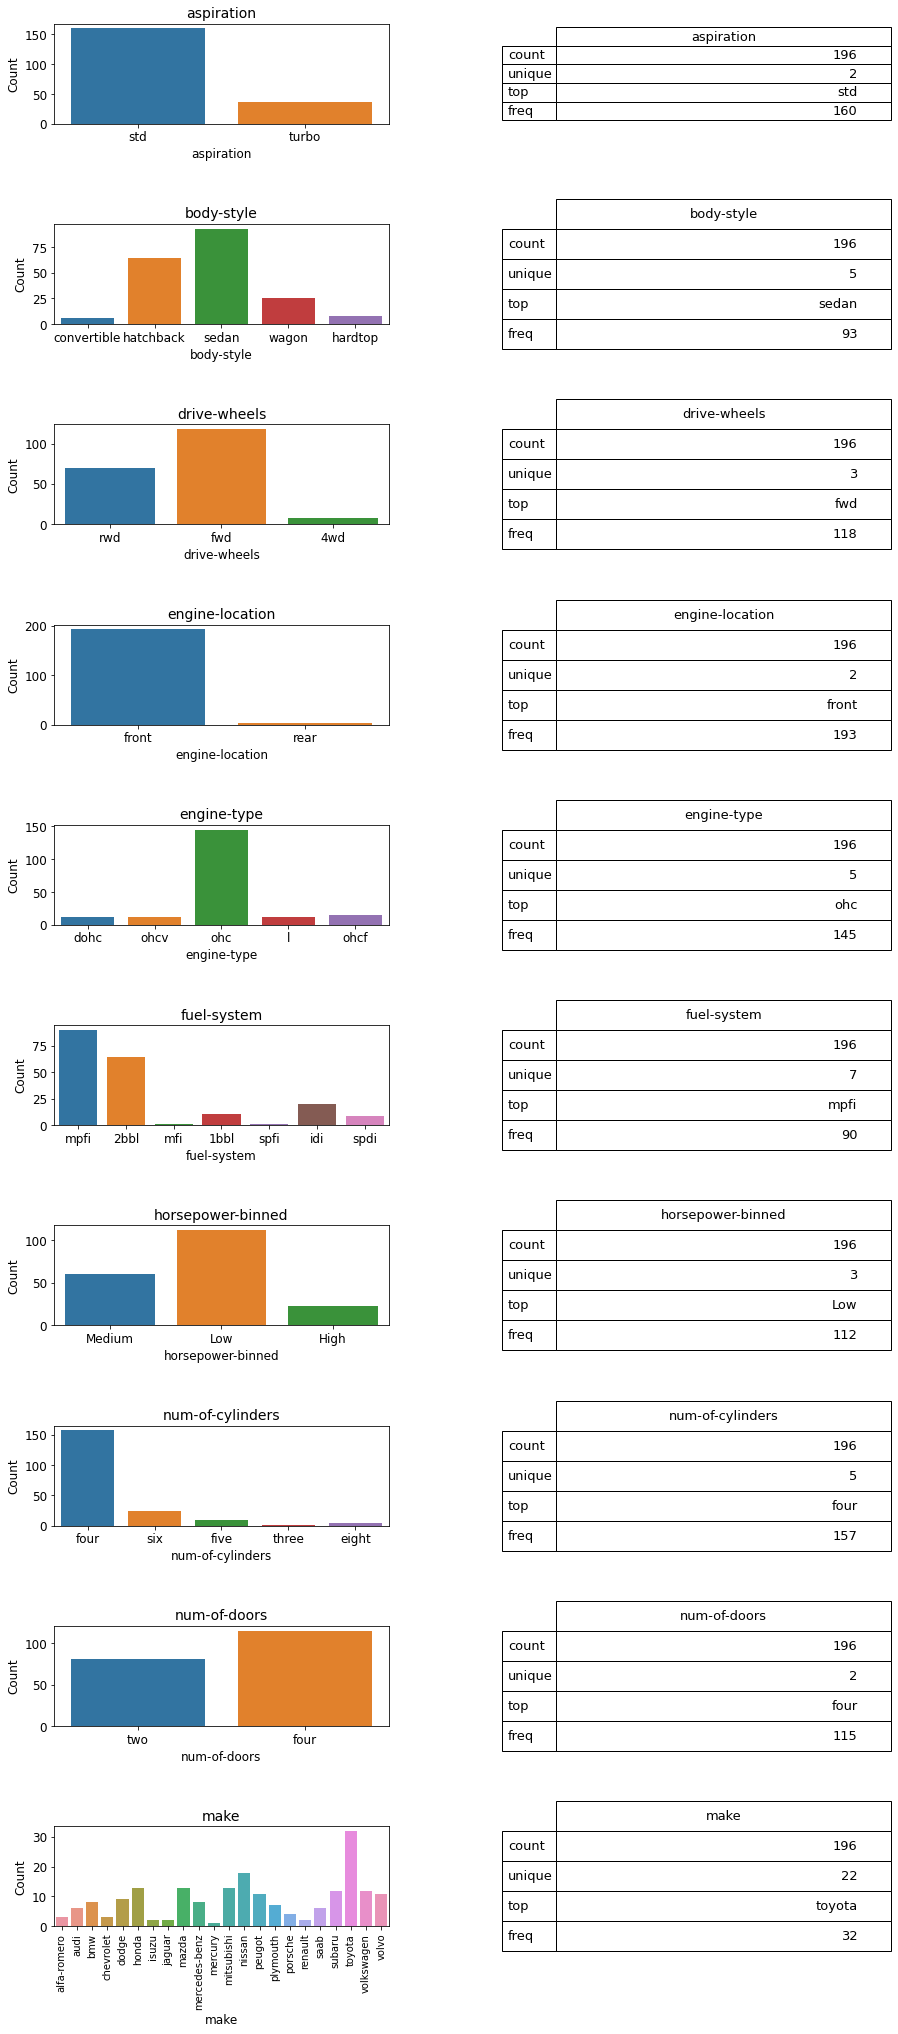

In [17]:
fig, axes = plt.subplots(nrows=len(Object_type_columns), ncols=2, figsize=(15, 35))    
for idx,cat_col in enumerate(['aspiration', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'fuel-system', 'horsepower-binned', 'num-of-cylinders', 'num-of-doors', 'make']):
    cl_idx=0    
    g = sns.countplot(x=cat_col, data=ds,ax=axes[idx,cl_idx])
    if cat_col=='make':
        g.set_xticklabels(g.get_xticklabels(),rotation=90)
    else:
        axes[idx][cl_idx].xaxis.set_tick_params(labelsize=12,rotation=0)
        
    axes[idx][cl_idx].set_title(cat_col,fontsize=14)
    axes[idx][cl_idx].yaxis.set_tick_params(labelsize=12)
    axes[idx][cl_idx].set_xlabel(cat_col,fontsize=12)
    axes[idx][cl_idx].set_ylabel('Count',fontsize=12)    
    df = pd.DataFrame(ds[cat_col], columns=[cat_col])
    des_lb=df.describe()
    table = axes[idx][cl_idx+1].table(cellText=des_lb.values, colLabels=des_lb.columns, rowLabels=des_lb.index,loc='center')
    table.set_fontsize(13)
    table.scale(1,2.5)
    plt.subplots_adjust(top = None, bottom=None, hspace=1.0, wspace=0.5)
    axes[idx][cl_idx+1].axis('off')
    
plt.show()

<b>Observations:</b>
 <br>
<b>
        1. Standard Aspiration is clearly more common than the Turbo.
    <br>
2. Among body-type Sedan and hatchback tops the list.
    <br>
3. Front Wheel Drive vehicles are sold more compared to others.
    <br>
4. Most vehicles have engine at the front.
    <br>
5. OHC is the most common engine type.
    <br>
6. Majority of vehicles have mpfl abd 2bbl fuel systems.
    <br>
7. Most cars have low and medium horse-power.
    <br>
8. Toyota seemed to be favored car company.
    <br>
9. 4-cylinder engine vehicles are most common.
    <br>
10. More vehicles have 4 doors, although cars with 2 doors are also popular.
    </b>

### Question 5
<h4> Use a single heat map to visualize the relationship between Body Style and Drive-wheel vs Price.</h4>
<h4>Perform the data preprocessing required.<br>

<p>The heatmap should plot  the target variable (price) proportional to colour with respect to the variables 'drive-wheel' and 'body-style' in the vertical and horizontal axis respectively. This allows us to visualize how the price is related to 'drive-wheel' and 'body-style'.</p>

The plot should have labels for x axis and y axis<br>
Write down your observations in a markdown cell below the visual</h4>

In [18]:
dsPrc=ds.copy()
lbEncode = LabelEncoder() 
dsPrc['drive-wheels']= lbEncode.fit_transform(dsPrc['drive-wheels'])
dsPrc['body-style']= lbEncode.fit_transform(dsPrc['body-style'])
dsPrc.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,0,2,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,0,2,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,2,2,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,3,1,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,3,0,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<b>Data Preprocessing:</b>
1. Drive-Wheel and Body-style are nominal data type attributes. 
2. The technique used for encoding the categorical attributes to numeric is <b>Label Encoding</b>.
3. One-hot encoding was also attempted but was not suitable for the asked questions, hence label Encoding is used.

                 price  drive-wheels  body-style
price         1.000000      0.594892   -0.081654
drive-wheels  0.594892      1.000000   -0.149712
body-style   -0.081654     -0.149712    1.000000


Text(87.0, 0.5, 'Price vs Body Style and Drive-wheel \n')

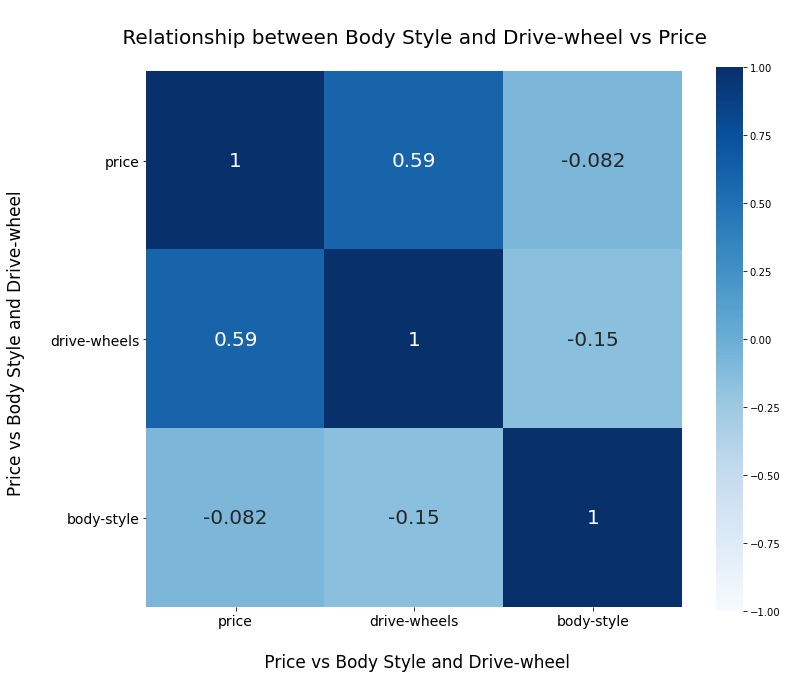

In [19]:
dsPrcCopy=dsPrc[['price','drive-wheels','body-style']]
f, ax = plt.subplots(figsize=(12, 10))
plt.title('\n Relationship between Body Style and Drive-wheel vs Price \n', fontsize=20)
print(dsPrcCopy.corr())
sns.heatmap(dsPrcCopy.corr(),cmap='Blues', vmin=-1.0, vmax=1.0, center=0,square=True,annot=True, annot_kws={"fontsize":20})    
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14,rotation=0)
ax.set_xlabel('\n Price vs Body Style and Drive-wheel',fontsize=17)
ax.set_ylabel('Price vs Body Style and Drive-wheel \n',fontsize=17)

<b>Observation:</b><br>
<b>1. Drive-wheels is strongly correleted with price, hence can be used for the prediction of the prices.
<br/><b>2. Body-style shows no evident correlation with the price, hence can be avoided for price prediction.

#### Summarize your observations

<b>Based on Descriptive Statistical Analysis on Continuous and Categorical attributes of the above dataset, results are summarized as below.</b>

- From Continuous attribute correlation, <b>positve highly correlated attribtues are Engine Size, Curb Weight, Horse Power, City-l/100kmh, Width, Length</b> and negatively correlated attributes are Highway-mpg & City-mpg.
<br><br>
- From correlation analysis with price, we can evidently say that Symboling, Normalized-losses, Compression-ratio, Peak-rpm, Stroke attributes are not adding value to price prediction.
<br><br>
- As Height does not vary much and its value remains between 50-60, we can evidently say it has minimal effect on the price.
<br><br>
- From Categorical attribute analysis, <b>Drive-wheels could be a potential predictor variable of price.</b>
<br><br>
- <b>Engine-Size & Drive-wheels is strongly correleted with price, hence can be used for the prediction of the prices.</b>

<h3><center>END OF ASSIGNMENT</center><h34>